In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.13.1


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
from matplotlib.image import imread
image_path = "/Users/spencertrinh/Downloads/thermo-scientific-nunc-142762-384-well-microwell-clear-bottom-plates-white-cell-culture-surface-0192993.jpg"
image = imread(image_path)

In [7]:
image[0]

array([[255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       ...,
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255]], dtype=uint8)

In [8]:
image[0].shape

(400, 3)

In [3]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

In [6]:
train_labels.shape

(60000,)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
test_labels.shape

(10000,)

In [9]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

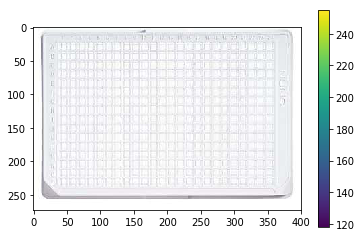

In [9]:
plt.figure()
plt.imshow(image)
plt.colorbar()
plt.grid(False)
plt.show()

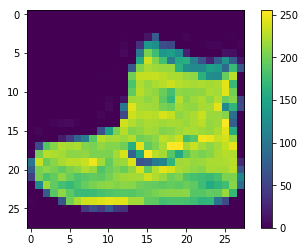

In [10]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [30]:
train_images = train_images / 255.0

test_images = test_images / 255.0

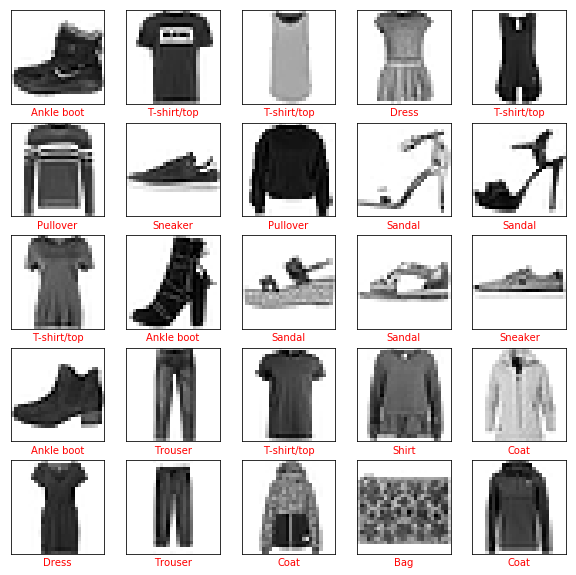

In [26]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    label = plt.xlabel(class_names[train_labels[i]])
    label.set_color("red")
plt.show()

In [4]:
'''The first layer in this network, tf.keras.layers.Flatten, transforms the format 
of the images from a 2d-array (of 28 by 28 pixels), to a 1d-array of 28 * 28 = 784 pixels.

These are densely-connected, or fully-connected, neural layers. The first Dense layer has 
128 nodes (or neurons). The second (and last) layer is a 10-node softmax layer—this returns 
an array of 10 probability scores that sum to 1. Each node contains a score that indicates 
the probability that the current image belongs to one of the 10 classes.'''
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
'''Loss function —This measures how accurate the model is during training. 
We want to minimize this function to "steer" the model in the right direction.

Optimizer —This is how the model is updated based on the data it sees and its loss function.

Metrics —Used to monitor the training and testing steps. The following example uses accuracy, 
the fraction of the images that are correctly classified.'''

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
'''Feed the training data to the model—in this example, the train_images and 
train_labels arrays.
The model learns to associate images and labels.
We ask the model to make predictions about a test set—in this example, the test_images array. 
We verify that the predictions match the labels from the test_labels array

As the model trains, the loss and accuracy metrics are displayed. 
This model reaches an accuracy of about 0.88 (or 88%) on the training data.'''

model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 7s 109us/sample - loss: 14.5065 - acc: 0.1000
Epoch 2/5
60000/60000 [==============================] - 6s 103us/sample - loss: 14.5063 - acc: 0.1000
Epoch 3/5
60000/60000 [==============================] - 7s 111us/sample - loss: 14.5063 - acc: 0.1000
Epoch 4/5
60000/60000 [==============================] - 7s 110us/sample - loss: 14.5063 - acc: 0.1000
Epoch 5/5
60000/60000 [==============================] - 7s 111us/sample - loss: 14.5063 - acc: 0.1000


In [7]:
'''compare how the model performs on the test dataset:

This gap between training accuracy and test accuracy is an example of overfitting. 
Overfitting is when a machine learning model performs worse on new data than on their 
training data.'''

test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 56us/sample - loss: 14.5063 - acc: 0.1000
Test accuracy: 0.1


In [8]:
predictions = model.predict(test_images)

In [32]:
predictions[0]

array([3.2015573e-06, 6.4997261e-09, 1.5040957e-06, 2.5326185e-06,
       3.8507711e-08, 2.0593099e-02, 2.8042384e-06, 1.4277509e-02,
       1.8801916e-04, 9.6493119e-01], dtype=float32)

In [33]:
'''A prediction is an array of 10 numbers. These describe the "confidence" of the model 
that the image corresponds to each of the 10 different articles of clothing. We can see 
which label has the highest confidence value:'''

np.argmax(predictions[0])

9

In [34]:
class_names[9]

'Ankle boot'

In [37]:
np.argmax(predictions[0]) == test_labels[0]

True

In [9]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    #left padding with 2's, 0 sf after decimal
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    #plt.xticks(range(10),class_names,rotation=90)
    plt.xticks(range(10),range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
    plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

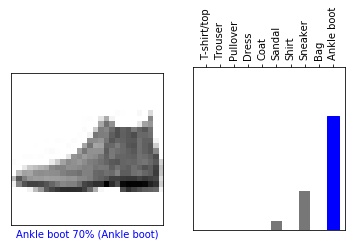

In [53]:
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(0,predictions,test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(0, predictions,  test_labels)
plt.show()

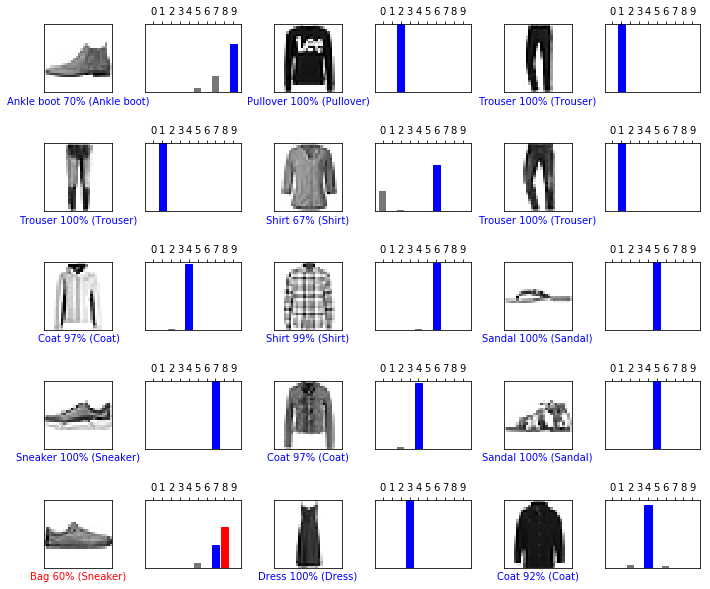

In [65]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
    plt.subplots_adjust(hspace=.75)
plt.show()